# Examples of network measures

In the network analysis section several network measures are used. We introduce these measures to the reader
through small examples. The subgraphs of $G_1$ used in these examples are generated here.

In [1]:
import networkx as nx
import numpy as np

import matplotlib.lines as lines
% matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
legend_properties = {'weight':'bold'}

In [4]:
G = nx.read_gml("../data/pd_graph.gml")

In [49]:
def draw_subgraph(graph, filename=None, size=(10, 5), layout=None):
    labels = {}
    for i,n in enumerate(graph.nodes()):
        labels.update({n : i})
        
        
    fig, ax = plt.subplots(figsize=size)
    if layout is None:
        pos = nx.spring_layout(graph)
    else:
        pos = nx.shell_layout(graph)
    nodes = nx.draw_networkx_nodes(graph, pos, linewidths=2, node_color='orange')
    nodes.set_edgecolor('black'); nx.draw_networkx_edges(graph, pos)

    nx.draw_networkx_labels(graph, pos, labels)
    limits=plt.axis('off')
    
    labels = {}
    for i, n in enumerate(graph.nodes()):
        labels.update({n : i})

    h = []
    for name in labels:
        h.append(lines.Line2D([], [], marker='$' + str(labels[name]) + '$', markersize=8, 
                              label=name.title(), linewidth=0, color='darkorange'))

        lgd  = ax.legend(handles=h, fontsize=20, bbox_to_anchor=(0, 1), prop=legend_properties)
    
    if filename:
        plt.savefig(filename, bbox_extra_artists=(lgd,), bbox_inches='tight')

Connected components + Isolated nodes
--------------------

A connected component of an undirected graph is a maximal set of nodes such that each pair of nodes is connected by a path

In [50]:
graphs = list(nx.connected_component_subgraphs(G))

In [51]:
H = nx.Graph()
H.add_node(list(nx.isolates(G))[0])

In [52]:
Z = graphs[4]

In [53]:
J = nx.compose(H, graphs[4])
J = nx.compose(J,  graphs[3])

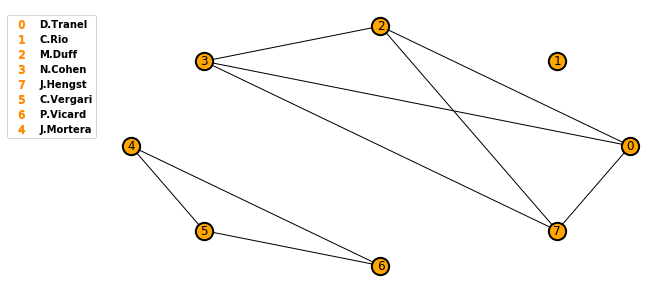

In [58]:
draw_subgraph(J, size=(10, 5), layout=True, filename='../../assets/images/connected_isolated.pdf')

**Sub graph with 5 connected component.**

In [20]:
H = nx.subgraph(G, ['kyle harriff', 'mikhail g. myagkov', 'tatiana s. babkina',
                    'ali alshawish','hermann de meer', 'yan junhao', 
                    'm. ramzan', 'jobin idiculla'])

In [21]:
nx.number_connected_components(H)

5

In [22]:
labels = {}
for i,n in enumerate(H.nodes()):
    labels.update({n : i})

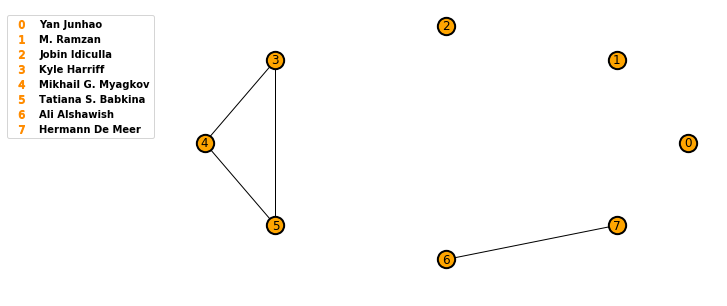

In [28]:
draw_subgraph(H, size=(10, 5), filename='/home/nightwing/rsc/Literature-Article/assets/images/connected_example_two.pdf',
              layout='shell')

2. Clustering
-----------

Clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together.

**Sub graph with clustering coefficient of 0.**

In [29]:
H = nx.subgraph(G, list(G.neighbors('r. axelrod')) + ['r. axelrod'])

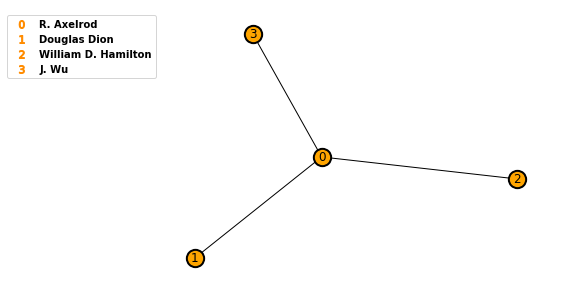

In [30]:
draw_subgraph(H, size=(7, 5),
              filename='/home/nightwing/rsc/Literature-Article/assets/images/clustering_example_one.pdf')

In [15]:
nx.average_clustering(H)

0.0

**Sub graph with clustering coefficient of 1.**

In [32]:
H = nx.subgraph(G, list(G.neighbors('nikoleta glynatsi')) + ['nikoleta glynatsi'])

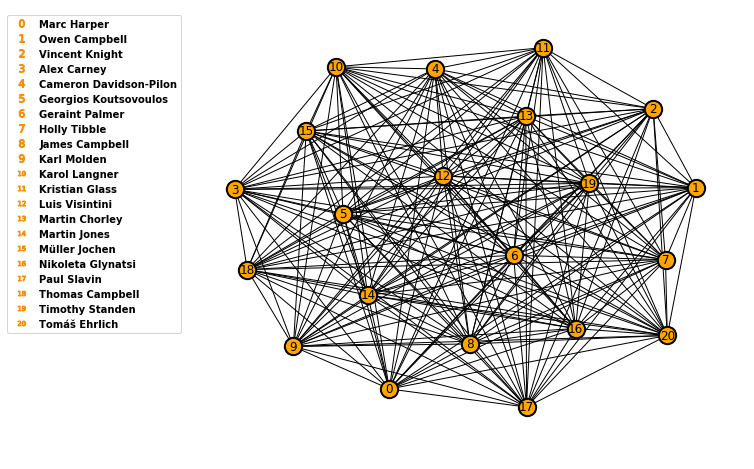

In [33]:
draw_subgraph(H, size=(10, 8), filename='/home/nightwing/rsc/Literature-Article/assets/images/clustering_example_three.pdf')

In [34]:
nx.average_clustering(H)

1.0

**Sub graph with clustering coefficient of 0.23.**

In [36]:
for name in list(G.nodes()):
    H = nx.subgraph(G, list(G.neighbors(name)) + [name])
    cc = nx.average_clustering(H)
    
    if (cc > 0) and (cc < 0.5):
        print(name)

naoki masuda
leopold-wildburger  ulrike


In [37]:
H = nx.subgraph(G, list(G.neighbors('naoki masuda')) + ['naoki masuda'])

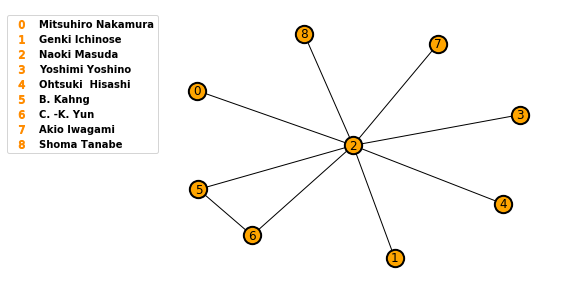

In [38]:
draw_subgraph(H, size=(7, 5),  filename='/home/nightwing/rsc/Literature-Article/assets/images/clustering_example_two.pdf')

In [39]:
nx.average_clustering(H)

0.22619047619047616